# 1. Packages

In [69]:
# Import packages

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# 2. Data

In [221]:
# Read both Train and Test csv files

original_test_df = pd.read_csv("test.csv")
original_train_df = pd.read_csv("train.csv")

In [71]:
original_test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [72]:
original_train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# 3. Data analysis

<AxesSubplot: >

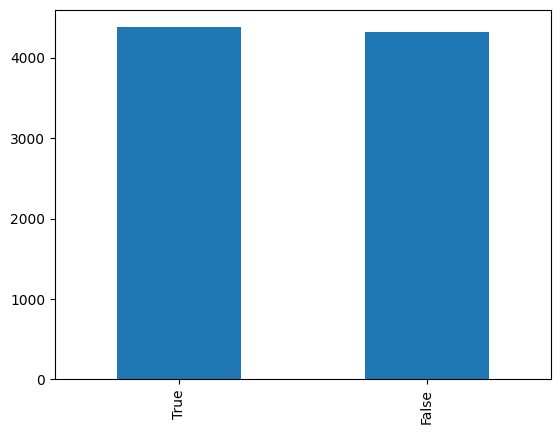

In [73]:
plot_df = original_train_df.Transported.value_counts()
plot_df.plot(kind="bar")

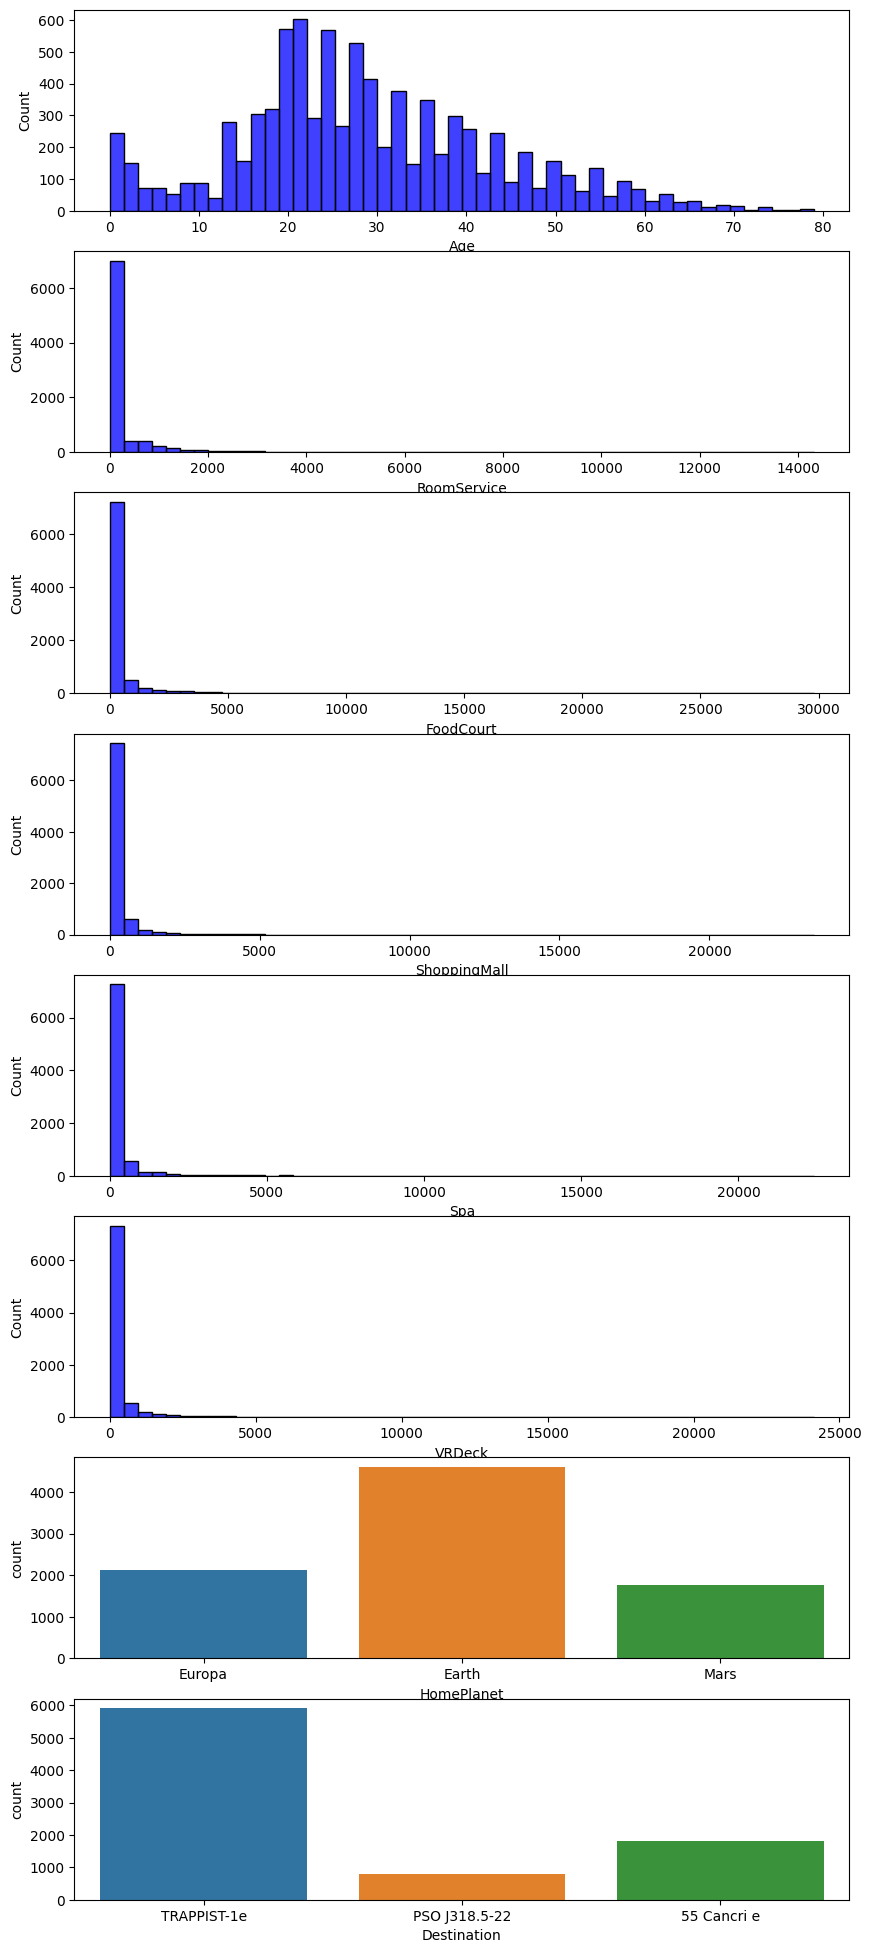

In [74]:
fig, ax = plt.subplots(8,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(original_train_df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(original_train_df['RoomService'], color='b', bins=50, ax=ax[1]);
sns.histplot(original_train_df['FoodCourt'], color='b', bins=50, ax=ax[2]);
sns.histplot(original_train_df['ShoppingMall'], color='b', bins=50, ax=ax[3]);
sns.histplot(original_train_df['Spa'], color='b', bins=50, ax=ax[4]);
sns.histplot(original_train_df['VRDeck'], color='b', bins=50, ax=ax[5]);
sns.countplot(x= original_train_df['HomePlanet'], ax=ax[6]);
sns.countplot(x= original_train_df['Destination'], ax=ax[7]);

<AxesSubplot: >

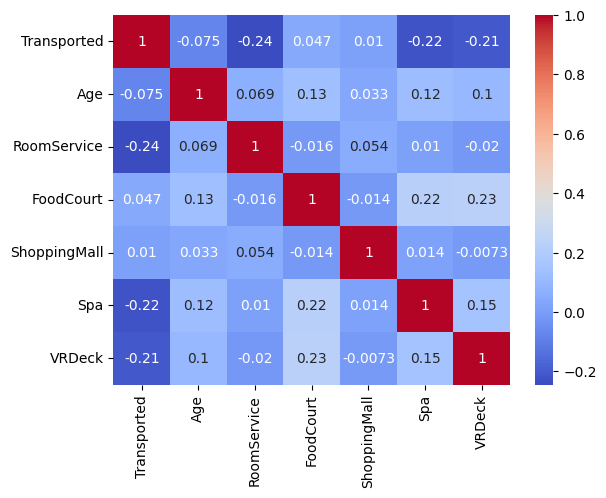

In [209]:
num_cols = ['Transported', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
sns.heatmap(data=original_train_df[num_cols].corr(), annot=True, cmap='coolwarm')

In [229]:
original_train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [211]:
original_train_df[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


In [212]:
original_train_df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [231]:
original_train_df[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.506332
1,True,0.381910


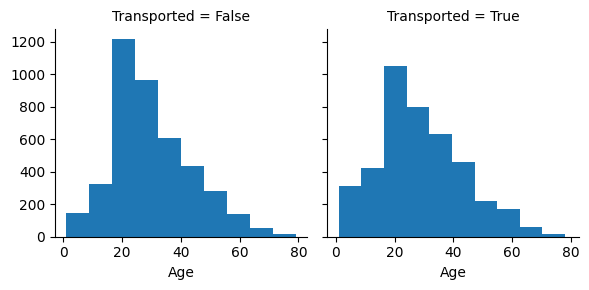

In [234]:
g = sns.FacetGrid(original_train_df[original_train_df['Age'] > 0], col='Transported')
g.map(plt.hist, 'Age', bins=10)

In [236]:
df_group_analysis = original_train_df
df_group_analysis[['PassengerGroup', 'Passenger']] = df_group_analysis['PassengerId'].str.split('_', expand=True)
group_size_dict = df_group_analysis['PassengerGroup'].value_counts().to_dict()
df_group_analysis['Group_size'] = df_group_analysis['PassengerGroup'].map(group_size_dict)
df_group_analysis[['Group_size', 'Transported']].groupby(['Group_size'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Group_size,Transported
3,4,0.640777
5,6,0.614943
2,3,0.593137
4,5,0.592453
6,7,0.541126
1,2,0.538050
0,1,0.452445
7,8,0.394231


# 4. Preprocessing functions
## Dealing with NaN

In [75]:
# Split Cabin column
def split_cabins (df):
    
    # Split "Cabin" column in 3 columns and drop the original one
    df[['Cabin_1', 'Cabin_2', 'Cabin_3']] = df['Cabin'].str.split('/',expand=True)
    df.drop(columns="Cabin", inplace=True)
    return df

In [76]:
# Split the PassengerId column to extract the group
def split_passenger(df):
    df[['PassengerGroup', 'Passenger']] = df['PassengerId'].str.split('_', expand=True)
    df.drop(columns = ['Passenger'], inplace=True)
    return df

In [77]:
# Replace nan values
def nan_values(df):
    
    # Replace "HomePlanet" null values with "Earth"
    df["HomePlanet"].fillna("Earth", inplace=True)
    # Replace "CryoSleep" null values with False
    df["CryoSleep"].fillna(False, inplace=True)
    # Replace "Destination" null values with "TRAPPIST-1e"
    df.loc[df["Destination"].isnull(), "Destination"] = "TRAPPIST-1e"

    # Replace rows with "Age" null values with mean
    imputer = SimpleImputer(strategy="mean") 
    imputer.fit(df[['Age']])
    df['Age'] = imputer.transform(df[['Age']])

    # Replace "VIP" null values with False, then Trues to 1 and Falses to 0
    df.loc[df["VIP"].isnull(), "VIP"] = False
    # Replace "RoomService" null values with 0
    df.loc[df["RoomService"].isnull(), "RoomService"] = 0
    # Replace "FoodCourt" null values with 0
    df.loc[df["FoodCourt"].isnull(), "FoodCourt"] = 0
    # Replace "ShoppingMall" null values with 0
    df.loc[df["ShoppingMall"].isnull(), "ShoppingMall"] = 0
    # Replace "Spa" null values with 0
    df.loc[df["Spa"].isnull(), "Spa"] = 0
    # Replace "VRDeck" null values with 0
    df.loc[df["VRDeck"].isnull(), "VRDeck"] = 0
    
    # Replace Cabin_1, 2, and 3 rows with null values with most frequent value
    # Instantiate a SimpleImputer
    imputer = SimpleImputer(strategy="most_frequent") 
    imputer.fit(df[['Cabin_1']])
    df['Cabin_1'] = imputer.transform(df[['Cabin_1']])

    imputer = SimpleImputer(strategy="most_frequent") 
    imputer.fit(df[['Cabin_2']])
    df['Cabin_2'] = imputer.transform(df[['Cabin_2']])
    df['Cabin_2'] = df['Cabin_2'].astype(int)

    imputer = SimpleImputer(strategy="most_frequent") 
    imputer.fit(df[['Cabin_3']])
    df['Cabin_3'] = imputer.transform(df[['Cabin_3']])
    
    return df


In [78]:
# Replace nan values with KNNImputer
from sklearn.impute import KNNImputer
def nan_values_knn(df):
    
    imputer = KNNImputer(n_neighbors=5)
    imputer.fit_transform(df)
    
    return df

## Encoding, scaling...

In [79]:
def encoding(df, set):
    
    # Drop PassengerId and Name columns
    df.drop(["PassengerId", "Name"], axis=1, inplace= True)
    # Replace "VIP" Trues with 1 and Falses with 0
    df["VIP"] = df["VIP"].astype(int)

    # Replace "CryoSleep" Trues with 1 and Falses with 0
    df["CryoSleep"] = df["CryoSleep"].astype(int)
    
    if set == "train":
        # Replace "Transported" Trues with 1 and Falses with 0
        df["Transported"] = df["Transported"].astype(int)
    
    # Instantiate the OneHotEncoder
    ohe_1 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_1.fit(df[['HomePlanet']])
    # Transform the current "HomePlanet" column
    df[ohe_1.get_feature_names_out()] = ohe_1.transform(df[['HomePlanet']]) 
    # Drop the column "HomePlanet" which has been encoded
    df.drop(columns = ["HomePlanet"], inplace = True)
    
    # Instantiate the OneHotEncoder
    ohe_2 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_2.fit(df[['Destination']])
    # Transform the current "Destination" column
    df[ohe_2.get_feature_names_out()] = ohe_2.transform(df[['Destination']]) 
    # Drop the column "Destination" which has been encoded
    df.drop(columns = ["Destination"], inplace = True)
    
    # Encoding Cabin_1 with order
    # Instantiate the Ordinal Encoder
    ordinal_encoder = OrdinalEncoder(categories = [["A", "B", "C", "D", "E", "F", "G", "T"]]) # Fit it
    ordinal_encoder.fit(df[["Cabin_1"]]) 
    # Transforming categories into ordered numbers
    df["encoded_Cabin_1"] = ordinal_encoder.transform(df[["Cabin_1"]])
    # Showing the transformed classes
    df.drop(columns= "Cabin_1", inplace=True)
    
    # Instantiate the OneHotEncoder
    ohe_4 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_4.fit(df[['Cabin_3']])
    # Transform the current "Cabin_3" column
    df[ohe_4.get_feature_names_out()] = ohe_4.transform(df[['Cabin_3']]) 
    # Drop the column "Cabin_3" which has been encoded
    df.drop(columns = ["Cabin_3"], inplace = True)
    
    return df
    

In [80]:
def encoding_knn(df):
    
    # Drop PassengerId and Name columns
    df.drop(["PassengerId", "Name"], axis=1, inplace= True)
    
    # Change the columns with object types
    df['CryoSleep'] = df['CryoSleep'].astype(bool)
    df['VIP'] = df['VIP'].astype(bool)
    df['Cabin_2'] = df['Cabin_2'].astype(float)
    
    # Instantiate the OneHotEncoder
    ordinal_encoder = OrdinalEncoder(categories = [['Europa', 'Earth', 'Mars']], handle_unknown='use_encoded_value', unknown_value= np.nan) 
    # Fit encoder
    ordinal_encoder.fit(df[['HomePlanet']])
    # Transform the current "HomePlanet" column
    df['Encoded_HomePlanet'] = ordinal_encoder.transform(df[['HomePlanet']]) 
    # Drop the column "HomePlanet" which has been encoded
    df.drop(columns = ["HomePlanet"], inplace = True)
    
    # Instantiate the OneHotEncoder
    ordinal_encoder = OrdinalEncoder(categories = [['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']], handle_unknown='use_encoded_value', unknown_value= np.nan) 
    # Fit encoder
    ordinal_encoder.fit(df[['Destination']])
    # Transform the current "HomePlanet" column
    df['Encoded_Destination'] = ordinal_encoder.transform(df[['Destination']]) 
    # Drop the column "HomePlanet" which has been encoded
    df.drop(columns = ["Destination"], inplace = True)
    
    # Encoding Cabin_1 with order
    # Instantiate the Ordinal Encoder
    ordinal_encoder = OrdinalEncoder(categories = [["A", "B", "C", "D", "E", "F", "G", "T"]], handle_unknown='use_encoded_value', unknown_value= np.nan) 
    # Fit it
    ordinal_encoder.fit(df[["Cabin_1"]]) 
    # Transforming categories into ordered numbers
    df["Encoded_Cabin_1"] = ordinal_encoder.transform(df[["Cabin_1"]])
    # Showing the transformed classes
    df.drop(columns= "Cabin_1", inplace=True)
    
    # Instantiate the Ordinal Encoder
    ordinal_encoder = OrdinalEncoder(categories = [["P", "S"]], handle_unknown='use_encoded_value', unknown_value= np.nan) 
    # Fit it
    ordinal_encoder.fit(df[["Cabin_3"]]) 
    # Transforming categories into ordered numbers
    df["Encoded_Cabin_3"] = ordinal_encoder.transform(df[["Cabin_3"]])
    # Showing the transformed classes
    df.drop(columns= "Cabin_3", inplace=True)
    
    return df

In [81]:
def encoding_knn_ohe(df):
    # Instantiate the OneHotEncoder
    ohe_1 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_1.fit(df[['Encoded_HomePlanet']])
    # Transform the current "HomePlanet" column
    df[ohe_1.get_feature_names_out()] = ohe_1.transform(df[['Encoded_HomePlanet']]) 
    # Drop the column "HomePlanet" which has been encoded
    df.drop(columns = ["Encoded_HomePlanet"], inplace = True)
    
    # Instantiate the OneHotEncoder
    ohe_2 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_2.fit(df[['Encoded_Destination']])
    # Transform the current "Destination" column
    df[ohe_2.get_feature_names_out()] = ohe_2.transform(df[['Encoded_Destination']]) 
    # Drop the column "Destination" which has been encoded
    df.drop(columns = ["Encoded_Destination"], inplace = True)
    
    # Instantiate the OneHotEncoder
    ohe_4 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_4.fit(df[['Encoded_Cabin_3']])
    # Transform the current "Cabin_3" column
    df[ohe_4.get_feature_names_out()] = ohe_4.transform(df[['Encoded_Cabin_3']]) 
    # Drop the column "Cabin_3" which has been encoded
    df.drop(columns = ["Encoded_Cabin_3"], inplace = True)
    
    return df

In [82]:
# Encoding Cabin_1 without order

def encoding_no_order(df, set):
    
    # Drop PassengerId and Name columns
    df.drop(["PassengerId", "Name"], axis=1, inplace= True)
    # Replace "VIP" Trues with 1 and Falses with 0
    df["VIP"] = df["VIP"].astype(int)

    # Replace "CryoSleep" Trues with 1 and Falses with 0
    df["CryoSleep"] = df["CryoSleep"].astype(int)
    
    if set == "train":
        # Replace "Transported" Trues with 1 and Falses with 0
        df["Transported"] = df["Transported"].astype(int)
    
    # Instantiate the OneHotEncoder
    ohe_1 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_1.fit(df[['HomePlanet']])
    # Transform the current "HomePlanet" column
    df[ohe_1.get_feature_names_out()] = ohe_1.transform(df[['HomePlanet']]) 
    # Drop the column "HomePlanet" which has been encoded
    df.drop(columns = ["HomePlanet"], inplace = True)
    
    # Instantiate the OneHotEncoder
    ohe_2 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_2.fit(df[['Destination']])
    # Transform the current "Destination" column
    df[ohe_2.get_feature_names_out()] = ohe_2.transform(df[['Destination']]) 
    # Drop the column "Destination" which has been encoded
    df.drop(columns = ["Destination"], inplace = True)
    
    # Encoding Cabin_1 without order, with One Hot Encoder
    # Instantiate the OneHotEncoder
    ohe_3 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_3.fit(df[['Cabin_1']])
    # Transform the current "Cabin_1" column
    df[ohe_3.get_feature_names_out()] = ohe_3.transform(df[['Cabin_1']]) 
    # Drop the column "Cabin_1" which has been encoded
    df.drop(columns = ["Cabin_1"], inplace = True)
    
    # Instantiate the OneHotEncoder
    ohe_4 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_4.fit(df[['Cabin_3']])
    # Transform the current "Cabin_3" column
    df[ohe_4.get_feature_names_out()] = ohe_4.transform(df[['Cabin_3']]) 
    # Drop the column "Cabin_3" which has been encoded
    df.drop(columns = ["Cabin_3"], inplace = True)
    
    return df

In [138]:
def passenger_grouping(df):
    group_size_dict = df['PassengerGroup'].value_counts().to_dict()
    df['Group_size'] = df['PassengerGroup'].map(group_size_dict)
    df.drop(columns= "PassengerGroup", inplace= True)
    return df

In [146]:
# One Hot Encode the new column "Group_size"
def grouping_encoding(df):
    # Instantiate the OneHotEncoder
    ohe = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe.fit(df[['Group_size']])
    # Transform the current "Cabin_3" column
    df[ohe.get_feature_names_out()] = ohe.transform(df[['Group_size']]) 
    # Drop the column "Cabin_3" which has been encoded
    df.drop(columns = ["Group_size"], inplace = True)
    return df

In [83]:
def scaling(df):
    
    # Step 0 - Instanciate Standard Scaler
    std_scaler = StandardScaler()
    # Step 1- Fit the scaler
    std_scaler.fit(df[['Age']]) 
    # 2-Scale/Transform
    # <-> apply the transformation (value - median) / IQR for every house
    df['Age'] = std_scaler.transform(df[['Age']])
    
    # Step 0 - Instanciate Standard Scaler
    std_scaler = StandardScaler()
    # Step 1- Fit the scaler
    std_scaler.fit(df[['RoomService']]) 
    # 2-Scale/Transform
    df['RoomService'] = std_scaler.transform(df[['RoomService']])

    # Step 0 - Instanciate Standard Scaler
    std_scaler = StandardScaler()
    # Step 1- Fit the scaler
    std_scaler.fit(df[['FoodCourt']]) 
    # 2-Scale/Transform
    df['FoodCourt'] = std_scaler.transform(df[['FoodCourt']])

    # Step 0 - Instanciate Standard Scaler
    std_scaler = StandardScaler()
    # Step 1- Fit the scaler
    std_scaler.fit(df[['ShoppingMall']]) 
    # 2-Scale/Transform
    df['ShoppingMall'] = std_scaler.transform(df[['ShoppingMall']])

    # Step 0 - Instanciate Standard Scaler
    std_scaler = StandardScaler()
    # Step 1- Fit the scaler
    std_scaler.fit(df[['Spa']]) 
    # 2-Scale/Transform
    df['Spa'] = std_scaler.transform(df[['Spa']])

    # Step 0 - Instanciate Standard Scaler
    std_scaler = StandardScaler()
    # Step 1- Fit the scaler
    std_scaler.fit(df[['VRDeck']]) 
    # 2-Scale/Transform
    df['VRDeck'] = std_scaler.transform(df[['VRDeck']])

    return df

In [84]:
# Full function
def full_preprocessing(df, set):
    df = split_cabins(df)
    df = nan_values(df)
    if set == "train":
        df = encoding(df, "train")
    else:
        df = encoding(df, "test")
    df = scaling(df)
    return df

In [85]:
# Full function with a different order to adapt to KNN Imputer
def full_preprocessing_knn(df):
    df = split_cabins(df)
    df = encoding_knn(df)
    df = nan_values_knn(df)
    df = scaling(df)
    return df

In [147]:
# Full function
def full_preprocessing_grouping(df, set):
    df = split_cabins(df)
    df = split_passenger(df)
    df = nan_values(df)
    if set == "train":
        df = encoding(df, "train")
    else:
        df = encoding(df, "test")
    df = scaling(df)
    df = passenger_grouping(df)
    df = grouping_encoding(df)
    return df

# 5. Modelling

## 5.1. Simple Random Forest Classifier

In [186]:
train_df = original_train_df.copy()
train_df = full_preprocessing(train_df, "train")

In [187]:
train_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_2,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,encoded_Cabin_1,Cabin_3_P,Cabin_3_S
0,0,0.709437,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0,-0.336717,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1,0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0
2,0,2.034566,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,0.290975,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,-0.894666,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1,1,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0.848924,1,-0.333105,3.992336,-0.283579,1.189173,-0.197751,0,98,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8689,1,-0.755179,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,1499,1.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0
8690,0,-0.197230,0,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,1,1500,1.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,1.0
8691,0,0.221232,0,-0.333105,0.376365,-0.283579,0.043013,2.589576,0,608,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0


## Cross validation

In [188]:
def cross_validation(X, y, model):
    cv_results = cross_validate(model, X, y, cv=5,
                                scoring=['r2']
    )
    print(pd.DataFrame(cv_results)) # Cross validation output

In [189]:
X = train_df.drop(columns = "Transported")
y = train_df["Transported"]
RFC_model_1 = RandomForestClassifier()
cross_validation(X, y, RFC_model_1)

   fit_time  score_time   test_r2
0  0.461534    0.020594  0.054576
1  0.451718    0.020633  0.026973
2  0.448330    0.020563  0.215597
3  0.442902    0.020850  0.281899
4  0.431666    0.019354  0.148406


## Fit the model with the full train test

In [190]:
RFC_model_1.fit(X, y)

RandomForestClassifier()

## Preprocess prediction

In [191]:
test_df = original_test_df.copy()
test_df = full_preprocessing(test_df, "test")

## Prediction

In [192]:
prediction = RFC_model_1.predict(test_df)

## Create the submission file

In [193]:
def create_csv(prediction, pred_number):
    prediction_df = pd.DataFrame(columns=("PassengerId", "Transported"))
    prediction_df["PassengerId"] = original_test_df["PassengerId"]
    prediction_df["Transported"] = prediction.astype(bool)
    csv_name = f'submission_2023-04-17_{pred_number}.csv'
    prediction_df.to_csv(csv_name, index=False)

In [194]:
create_csv(prediction, 1)

## 5.2. Another method dropping the Cabin number column

In [585]:
train_df_2 = train_df.copy()
train_df_2 = train_df_2.drop(columns="Cabin_2")
X_2 = train_df_2.drop(columns = "Transported")
y_2 = train_df_2["Transported"]
RFC_model_2 = RandomForestClassifier()
cv_results_2 = cross_validate(RFC_model_2, X_2, y_2, cv=5,
                            scoring=['r2']
)
pd.DataFrame(cv_results_2)

,fit_time,score_time,test_r2
0,0.399654,0.022221,0.086780
1,0.391022,0.022359,0.107483
2,0.390657,0.022209,0.190294
3,0.391697,0.023754,0.173724
4,0.389693,0.021656,0.136898


In [582]:
RFC_model_2.fit(X_2, y_2)

RandomForestClassifier()

In [583]:
X_pred_2 = test_df.copy()
X_pred_2 = X_pred_2.drop(columns="Cabin_2")
prediction_2 = RFC_model_2.predict(X_pred_2)
create_csv(prediction_2, 2)

### --> This second trial is not valid, it gives worse scoring.

## 5.3. Another trial with One Hot Encoder for Cabin_1

In [560]:
# Preprocess train
train_df_3 = original_train_df.copy()
train_df_3 = full_preprocessing(train_df_3, "train")

# Cross validation
X_3 = train_df_3.drop(columns = "Transported")
y_3 = train_df_3["Transported"]
RFC_model_3 = RandomForestClassifier()
cross_validation(X_3, y_3, RFC_model_3)

   fit_time  score_time   test_r2
0  0.440749    0.019619  0.049976
1  0.432910    0.020627  0.029273
2  0.447297    0.020257  0.220198
3  0.436437    0.020451  0.284201
4  0.433925    0.019513  0.139199


In [584]:
# Fit model
RFC_model_3.fit(X_3, y_3)

# Preprocess prediction
test_df_3 = original_test_df.copy()
test_df_3 = full_preprocessing(test_df_3, "test")

# Prediction
prediction_3 = RFC_model_3.predict(test_df_3)

# Submission file
create_csv(prediction_3, 3)

### --> Still worse scoring

## 5.4. Optimizing parameters

In [586]:
# Preprocess train
train_df_4 = original_train_df.copy()
train_df_4 = full_preprocessing(train_df_4, "train")

# X and y
X_4 = train_df_4.drop(columns = "Transported")
y_4 = train_df_4["Transported"]

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [587]:
# Train/Test split
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.20, random_state=1) 
# Instanciate model
RFC_model_4 = RandomForestClassifier()
# Hyperparameter Grid
grid_4 = {'n_estimators': [150, 200, 500],
        'max_depth': [10, 15],
        'min_samples_split': [10, 15, 20],
        'min_samples_leaf': [1, 2, 5, 10, 15],
        'criterion': ['gini']}
# Instanciate Grid Search
search_4 = RandomizedSearchCV(RFC_model_4, grid_4,
                           scoring = 'r2',
                           cv = 5,
                           n_iter = 100,
                           n_jobs=-1 # paralellize computation
)
# Fit data to Grid Search
search_4.fit(X_train_4,y_train_4)
# Best score
print(search_4.best_score_)
# Best Params
print(search_4.best_params_)
# Best estimator
print(search_4.best_estimator_)

/Users/jaimesoroarubio/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.22174072090261915
{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}
RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=500)


In [588]:
# Cross validation
RFC_model_4 = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, min_samples_split=10, max_depth=10, criterion='gini')
cv_results_4 = cross_validate(RFC_model_4, X_4, y_4, cv=5,
                            scoring=['r2']
)
pd.DataFrame(cv_results_4)

,fit_time,score_time,test_r2
0,1.696475,0.071263,0.049976
1,1.674112,0.073566,0.102883
2,1.644755,0.073461,0.194895
3,1.666711,0.074548,0.300312
4,1.647346,0.073049,0.215152


In [589]:
# Fit model
RFC_model_4.fit(X_4, y_4)

# Preprocess prediction
test_df_4 = original_test_df.copy()
test_df_4 = full_preprocessing(test_df_4, "test")

# Prediction
prediction_4 = RFC_model_4.predict(test_df_4)

# Submission file
create_csv(prediction_4, 4)

## 5.5. With XGBoost

In [86]:
import xgboost as xgb

In [90]:
# Preprocess train
train_df_5 = original_train_df.copy()
train_df_5 = full_preprocessing(train_df_5, "train")

# X and y
X_5 = train_df_5.drop(columns = "Transported")
y_5 = train_df_5["Transported"]

In [91]:
# Train/Test split
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.20, random_state=1) 
# Instanciate model
XGB_model_5 = xgb.XGBClassifier()
# Hyperparameter Grid
grid_5 = {'eta': [0.3, 0.5],
        'gamma': [5, 10],
        'max_depth': [10, 15],
        'min_child_weight': [5, 10],
        'max_delta_step': [0, 5]}
# Instanciate Grid Search
search_5 = RandomizedSearchCV(XGB_model_5, grid_5,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
)
# Fit data to Grid Search
search_5.fit(X_train_5,y_train_5)
# Best score
print(search_5.best_score_)
# Best Params
print(search_5.best_params_)

0.22979578459420785
{'min_child_weight': 5, 'max_depth': 15, 'max_delta_step': 0, 'gamma': 10, 'eta': 0.3}


In [103]:
test_df_5 = original_test_df.copy()
test_df_5 = full_preprocessing(test_df_5, "test")
XGB_model_5 = xgb.XGBClassifier(min_child_weight= 5, max_depth= 10, max_delta_step= 0, gamma= 5, eta= 0.3)
XGB_model_5.fit(X_5, y_5)
prediction_5 = XGB_model_5.predict(test_df_5)
create_csv(prediction_5, 5)

## 5.6. XGBoost with KNNImputer

In [810]:
# Preprocess train
train_df_6 = original_train_df.copy()
train_df_6 = split_cabins(train_df_6)
train_df_6 = encoding_knn(train_df_6)
imputer_knn_6 = KNNImputer(n_neighbors=5)
imputer_knn_6.fit(train_df_6)
train_df_6 = pd.DataFrame(imputer_knn_6.transform(train_df_6), columns = train_df_6.columns)
train_df_6 = encoding_knn_ohe(train_df_6)

In [811]:
train_df_6 = scaling(train_df_6)

In [812]:
# X and y
X_6 = train_df_6.drop(columns = "Transported")
y_6 = train_df_6["Transported"]

test_df_6 = original_test_df.copy()
test_df_6 = split_cabins(test_df_6)
test_df_6 = encoding_knn(test_df_6)
imputer_knn_6 = KNNImputer(n_neighbors=5)
imputer_knn_6.fit(test_df_6)
test_df_6 = pd.DataFrame(imputer_knn_6.transform(test_df_6), columns = test_df_6.columns)
test_df_6 = encoding_knn_ohe(test_df_6)

In [813]:
XGB_model_6 = xgb.XGBClassifier(min_child_weight= 5, max_depth= 10, max_delta_step= 0, gamma= 5, eta= 0.3)
XGB_model_6.fit(X_6, y_6)
prediction_6 = XGB_model_6.predict(test_df_6)
create_csv(prediction_6, 6)

In [814]:
cross_validation(X_6, y_6, XGB_model_6)

   fit_time  score_time   test_r2
0  1.003089    0.002664 -0.025934
1  0.859127    0.003505  0.045375
2  0.863334    0.003643  0.160390
3  0.893249    0.002955  0.307217
4  0.942530    0.002539  0.166819


### --> Disaster, the Kaggle score drops to 0.50.

## 5.7. Using Passenger Group

In [148]:
train_df_7 = original_train_df.copy()
train_df_7 = full_preprocessing_grouping(train_df_7, 'train')

In [149]:
# X and y
X_7 = train_df_7.drop(columns = "Transported")
y_7 = train_df_7["Transported"]

In [150]:
train_df_7.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_2,...,Cabin_3_P,Cabin_3_S,Group_size_1,Group_size_2,Group_size_3,Group_size_4,Group_size_5,Group_size_6,Group_size_7,Group_size_8
0,0,0.709437,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.336717,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2.034566,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.290975,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,-0.894666,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
test_df_7 = original_test_df.copy()
test_df_7 = full_preprocessing_grouping(test_df_7, 'test')

In [152]:
test_df_7.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_2,HomePlanet_Earth,...,Cabin_3_P,Cabin_3_S,Group_size_1,Group_size_2,Group_size_3,Group_size_4,Group_size_5,Group_size_6,Group_size_7,Group_size_8
0,1,-0.118222,0,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,3,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.688601,0,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,4,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.166968,0,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.666051,0,-0.357339,4.121518,-0.312173,-0.104002,0.226648,1,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,-0.617304,0,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,5,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
XGB_model_7 = xgb.XGBClassifier(min_child_weight= 5, max_depth= 10, max_delta_step= 0, gamma= 5, eta= 0.3)
XGB_model_7.fit(X_7, y_7)
prediction_7 = XGB_model_7.predict(test_df_7)
create_csv(prediction_7, 7)

# 6. Modelling with Tensorflow

## 6.1. With Tensorflow Decision Forest

In [237]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [164]:
def full_preprocessing_tf(df, set, encode= False, scale= False):
    df = split_cabins(df)
    df = split_passenger(df)
    df = nan_values(df)
    if encode:
        if set == "train":
            df = encoding(df, "train")
        else:
            df = encoding(df, "test")
    else:
        # Drop PassengerId and Name columns
        df.drop(["PassengerId", "Name"], axis=1, inplace= True)
        # Replace "VIP" Trues with 1 and Falses with 0
        df["VIP"] = df["VIP"].astype(int)
        # Replace "CryoSleep" Trues with 1 and Falses with 0
        df["CryoSleep"] = df["CryoSleep"].astype(int)
        if set == "train":
            # Replace "Transported" Trues with 1 and Falses with 0
            df["Transported"] = df["Transported"].astype(int)
    if scale:        
        df = scaling(df)
    df = passenger_grouping(df)
    if encode:
        df = grouping_encoding(df)
    return df

In [165]:
train_df_8 = original_train_df.copy()
train_df_8 = full_preprocessing_tf(train_df_8, 'train')

In [168]:
train_df_8

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1,Cabin_2,Cabin_3,Group_size
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P,1
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,2
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,2
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,A,98,P,1
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,G,1499,S,1
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,G,1500,S,1
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,E,608,S,2


In [171]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_df_tf_8, valid_df_tf_8 = split_dataset(train_df_8)
print("{} examples in training, {} examples in testing.".format(
    len(train_df_tf_8), len(valid_df_tf_8)))

6951 examples in training, 1742 examples in testing.


In [172]:
train_ds_tf_8 = tfdf.keras.pd_dataframe_to_tf_dataset(train_df_tf_8, label="Transported")
valid_ds_tf_8 = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df_tf_8, label="Transported")

In [174]:
rf_tf_8 = tfdf.keras.RandomForestModel()
rf_tf_8.compile(metrics=["accuracy"]) # Optional, you can use this to include a list of eval metrics

Use /var/folders/jt/ljcpcwg95nv566n6vzs4822m0000gn/T/tmpzd9ksmms as temporary training directory


In [175]:
rf_tf_8.fit(x=train_ds_tf_8)

Reading training dataset...
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training dataset read in 0:00:02.327489. Found 6951 examples.
Training model...


2023-04-18 13:57:44.153068: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
[INFO 2023-04-18T13:57:44.823242+02:00 kernel.cc:1214] Loading model from path /var/folders/jt/ljcpcwg95nv566n6vzs4822m0000gn/T/tmpzd9ksmms/model/ with prefix 37358c82876f475a


Model trained in 0:00:01.016116
Compiling model...


[INFO 2023-04-18T13:57:45.190009+02:00 decision_forest.cc:661] Model loaded with 300 root(s), 266064 node(s), and 14 input feature(s).
[INFO 2023-04-18T13:57:45.190045+02:00 abstract_model.cc:1312] Engine "RandomForestOptPred" built
[INFO 2023-04-18T13:57:45.190061+02:00 kernel.cc:1046] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [176]:
tfdf.model_plotter.plot_model_in_colab(rf_tf_8, tree_idx=0, max_depth=3)

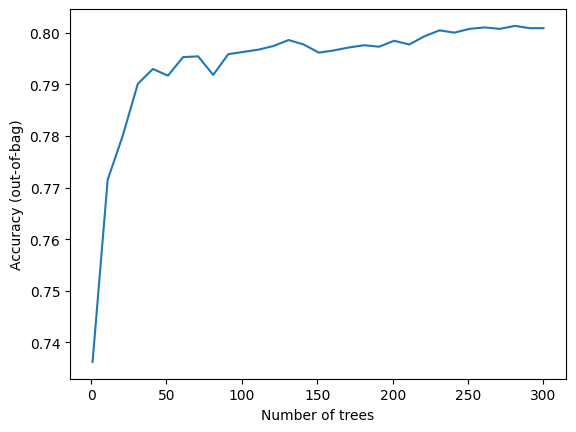

In [177]:
logs = rf_tf_8.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [178]:
inspector = rf_tf_8.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6951, accuracy=0.8008919579916559, loss=0.45957793898244326, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [179]:
evaluation = rf_tf_8.evaluate(x=valid_ds_tf_8,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 0.8088
loss: 0.0000
accuracy: 0.8088


In [180]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES
	 SUM_SCORE
	 NUM_AS_ROOT


In [181]:
# Each line is: (feature name, (index of the feature), importance score)
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #4), 109.0),
 ("RoomService" (1; #9), 59.0),
 ("Spa" (1; #11), 54.0),
 ("VRDeck" (1; #13), 39.0),
 ("ShoppingMall" (1; #10), 19.0),
 ("FoodCourt" (1; #6), 15.0),
 ("Cabin_1" (4; #1), 3.0),
 ("HomePlanet" (4; #8), 2.0)]

In [182]:
# Load the test dataset
test_df_tf_8 = original_test_df.copy()
submission_id = test_df_tf_8.PassengerId

test_df_tf_8 = full_preprocessing_tf(test_df_tf_8, 'test')

# Convert pd dataframe to tf dataset
test_ds_tf_8 = tfdf.keras.pd_dataframe_to_tf_dataset(test_df_tf_8)

# Get the predictions for testdata
predictions = rf_tf_8.predict(test_ds_tf_8)
n_predictions = (predictions > 0.5).astype(bool)
output_tf_8 = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output_tf_8.head()

5/5 [==============================] - 0s 21ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [185]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv('submission_2023-04-17_8.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [201]:
dataset_df = original_train_df
dataset_df = dataset_df.drop(['PassengerId', 'Name'], axis=1)
dataset_df.head(5)
dataset_df.isnull().sum().sort_values(ascending=False)
dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
dataset_df.isnull().sum().sort_values(ascending=False)
label = "Transported"
dataset_df[label] = dataset_df[label].astype(int)
dataset_df['VIP'] = dataset_df['VIP'].astype(int)
dataset_df['CryoSleep'] = dataset_df['CryoSleep'].astype(int)
dataset_df[["Deck", "Cabin_num", "Side"]] = dataset_df["Cabin"].str.split("/", expand=True)
try:
    dataset_df = dataset_df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")
def split_dataset(dataset, test_ratio=0.20):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]
train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(len(train_ds_pd), len(valid_ds_pd)))
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"])
rf.fit(x=train_ds)
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

6941 examples in training, 1752 examples in testing.
Use /var/folders/jt/ljcpcwg95nv566n6vzs4822m0000gn/T/tmpjz_15l_1 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.156368. Found 6941 examples.
Training model...


[INFO 2023-04-18T16:27:33.433392+02:00 kernel.cc:1214] Loading model from path /var/folders/jt/ljcpcwg95nv566n6vzs4822m0000gn/T/tmpjz_15l_1/model/ with prefix e2dc173028a94f46


Model trained in 0:00:14.732003
Compiling model...
Model compiled.


[INFO 2023-04-18T16:27:33.789582+02:00 decision_forest.cc:661] Model loaded with 300 root(s), 230796 node(s), and 13 input feature(s).
[INFO 2023-04-18T16:27:33.789622+02:00 abstract_model.cc:1312] Engine "RandomForestGeneric" built
[INFO 2023-04-18T16:27:33.789635+02:00 kernel.cc:1046] Use fast generic engine


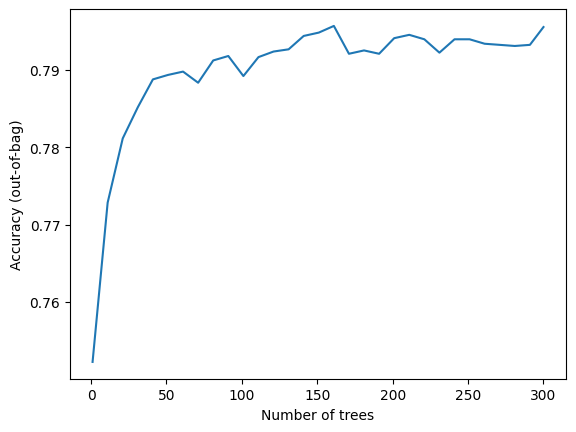

In [202]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [203]:
inspector = rf.make_inspector()
inspector.evaluation()
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 0.8031
loss: 0.0000
accuracy: 0.8031


In [205]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)
# Each line is: (feature name, (index of the feature), importance score)
inspector.variable_importances()["NUM_AS_ROOT"]

Available variable importances:
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT


[("CryoSleep" (1; #2), 114.0),
 ("Spa" (1; #10), 69.0),
 ("RoomService" (1; #7), 60.0),
 ("VRDeck" (1; #12), 35.0),
 ("FoodCourt" (1; #5), 10.0),
 ("ShoppingMall" (1; #8), 10.0),
 ("Deck" (4; #3), 2.0)]

In [207]:
# Load the test dataset
test_df = pd.read_csv('test.csv')
submission_id = test_df.PassengerId

# Replace NaN values with zero
test_df[['VIP', 'CryoSleep']] = test_df[['VIP', 'CryoSleep']].fillna(value=0)

# Creating New Features - Deck, Cabin_num and Side from the column Cabin and remove Cabin
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
test_df = test_df.drop('Cabin', axis=1)

# Convert boolean to 1's and 0's
test_df['VIP'] = test_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

# Convert pd dataframe to tf dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

# Get the predictions for testdata
predictions = rf.predict(test_ds)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()

5/5 [==============================] - 0s 36ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [208]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv('submission_9.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
